In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
%matplotlib inline 

In [5]:
from os import listdir
from os.path import isfile, join, abspath, isdir
from sys import path

In [6]:
module_path = abspath(join('..'))
if module_path not in path:
    path.append(module_path)

In [10]:
from prep.parsing import *
from prep.parser import Parser

/home/yesu/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [11]:
from PIL import Image

Here we explore a bit of the data as well as testing the given code

### Test parser 

In [12]:
root_dir = '/hdd/arterys/final_data'
linkfile = 'link.csv'
dicom_dir = 'dicoms'
contour_dir = 'contourfiles'

In [13]:
!pwd

/home/yesu/PycharmProjects/arterys/notebooks


In [16]:
processed_dir = '/hdd/arterys/processed'

In [10]:
parser = Parser(root_dir, dicom_dir=dicom_dir, contour_dir=contour_dir, 
                linkfile=linkfile, processed_dir=processed_dir)

In [11]:
masks_to_check = parser.parse_all_patients(check_mask=Parser.check_by_intensity)

In [13]:
masks_to_check

[]

#### Read in one image and one mask 

In [15]:
images = listdir(image_dir)

In [18]:
filename = images[0]

In [29]:
image = Image.open(join(processed_dir, 'images', filename))

In [34]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

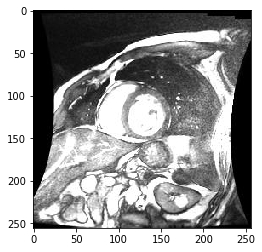

In [30]:
plt.imshow(image);

In [31]:
mask = Image.open(join(processed_dir, 'masks', filename))

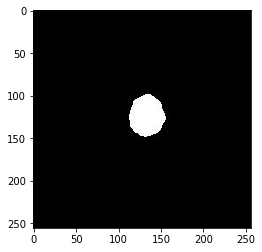

In [32]:
plt.imshow(mask);

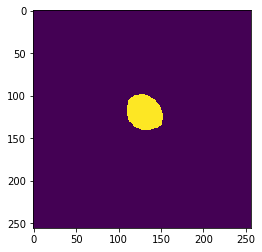

In [17]:
plt.imshow(masks[40,:,:])

In [13]:
path_to_dicoms = '/hdd/arterys/final_data/dicoms/'
path_to_contours = '/hdd/arterys/final_data/contourfiles/'

In [14]:
link_file = '/hdd/arterys/final_data/link.csv'

In [15]:
link = pd.read_csv(link_file)

In [16]:
link.head()

,patient_id,original_id
0,SCD0000101,SC-HF-I-1
1,SCD0000201,SC-HF-I-2
2,SCD0000301,SC-HF-I-4
3,SCD0000401,SC-HF-I-5
4,SCD0000501,SC-HF-I-6


In [17]:
link.shape

(5, 2)

In [18]:
for _, row in link.iterrows():
    print(row['patient_id'])
    break

SCD0000101


### Test read dicom and contour 

In [19]:
contour_path1 = join(path_to_contours, 'SC-HF-I-1/i-contours')

In [20]:
contour_path1

'/hdd/arterys/final_data/contourfiles/SC-HF-I-1/i-contours'

In [21]:
contour_fnames = [join(contour_path1, f) for f in listdir(contour_path1) if isfile(join(contour_path1, f))]

In [22]:
len(contour_fnames)

18

In [23]:
mask_names = listdir(contour_path1)

In [24]:
str(int(mask_names[0].split('-')[2])) + '.dcm'

'48.dcm'

In [25]:
contour_fnames[0]

'/hdd/arterys/final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0048-icontour-manual.txt'

In [26]:
contour_fnames[1]

'/hdd/arterys/final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0079-icontour-manual.txt'

In [27]:
test_contour = parse_contour_file(contour_fnames[0])

In [28]:
# list of tuples
test_contour

[(120.5, 137.5),
 (120.5, 137.0),
 (121.0, 136.5),
 (121.0, 136.0),
 (121.5, 135.5),
 (121.5, 135.0),
 (122.0, 134.5),
 (122.0, 134.0),
 (122.5, 133.5),
 (123.0, 133.0),
 (123.5, 132.5),
 (124.0, 132.0),
 (124.5, 131.5),
 (125.0, 131.0),
 (125.5, 131.0),
 (126.0, 130.5),
 (126.5, 130.0),
 (127.0, 130.0),
 (127.5, 130.0),
 (128.0, 129.5),
 (128.5, 129.5),
 (129.0, 129.0),
 (129.5, 129.0),
 (130.0, 129.0),
 (130.5, 129.0),
 (131.0, 129.0),
 (131.5, 128.5),
 (132.0, 128.5),
 (132.5, 128.5),
 (133.0, 128.5),
 (133.5, 128.5),
 (134.0, 128.5),
 (134.5, 128.5),
 (135.0, 128.5),
 (135.5, 128.5),
 (136.0, 128.5),
 (136.5, 128.5),
 (137.0, 128.5),
 (137.5, 129.0),
 (138.0, 129.0),
 (138.5, 129.0),
 (139.0, 129.0),
 (139.5, 129.5),
 (140.0, 129.5),
 (140.5, 129.5),
 (141.0, 130.0),
 (141.5, 130.0),
 (142.0, 130.5),
 (142.5, 131.0),
 (143.0, 131.0),
 (143.5, 131.5),
 (144.0, 132.0),
 (144.5, 132.5),
 (145.0, 133.0),
 (145.0, 133.5),
 (145.5, 134.0),
 (145.5, 134.5),
 (146.0, 135.0),
 (146.0, 135.5

In [29]:
dicom_path1 = join(path_to_dicoms, 'SCD0000101/')

In [30]:
dicom_fnames = [join(dicom_path1, f) for f in listdir(dicom_path1) if isfile(join(dicom_path1, f))]

In [31]:
len(dicom_fnames)

240

In [32]:
try:
    no_dicom = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/123333333333333.dcm')
except FileNotFoundError:
    print('no file found')

no file found


In [34]:
# take the dicom with the same number as the contour, 48
test_dicom = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/48.dcm')['pixel_data']

In [35]:
test_dicom.shape

(256, 256)

In [49]:
cv2.imwrite('testsave.jpeg', test_dicom)

True

In [55]:
testsave = cv2.imread('./testsave.jeg')

In [56]:
type(testsave)

NoneType

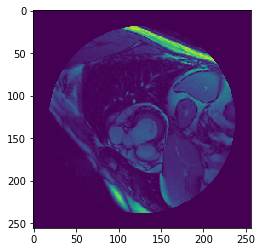

In [57]:
plt.imshow(test_dicom)

In [58]:
Image.fromarray(test_dicom).convert('RGB').save('test.jpeg', mode='jpeg')

In [59]:
testim = cv2.imread('test.jpeg')

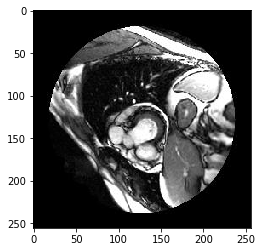

In [61]:
plt.imshow(testim);

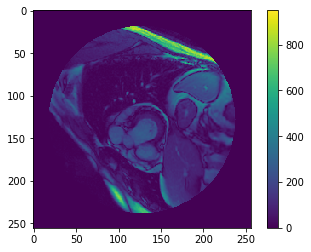

In [28]:
plt.imshow(test_dicom);plt.colorbar();

In [48]:
test_dicom2 = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/79.dcm')['pixel_data']

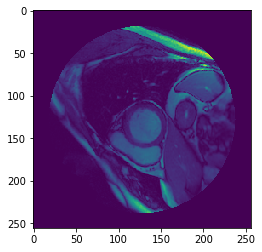

In [49]:
plt.imshow(test_dicom2)

In [62]:
test = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/79.dcm')

In [63]:
# test poly to mask
mask = poly_to_mask(test_contour, 256, 256)

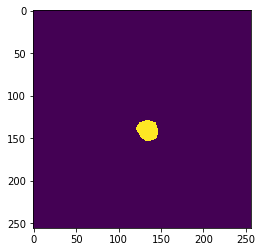

In [64]:
plt.imshow(mask);

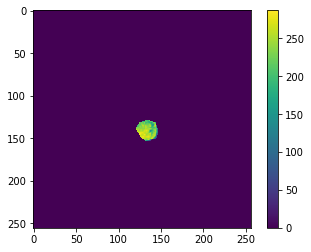

In [65]:
plt.imshow(np.multiply(mask.astype(int), (test_dicom)));plt.colorbar();

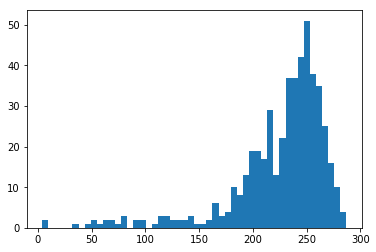

In [66]:
plt.hist(test_dicom[mask], bins = 50);

In [87]:
Image.fromarray(mask).convert('L').save('testmask.bmp')

In [90]:
testmask = Image.open('testmask.bmp')

In [115]:
testmask = Image.fromarray(np.uint8(255*mask))

In [122]:
testmask.convert('RGB').save('testmask.jpeg')

In [123]:
testmask2 = Image.open('testmask.jpeg')

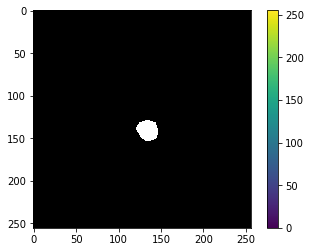

In [124]:
plt.imshow(testmask);plt.colorbar();

In [41]:
np.median(test_dicom[mask])

238.0

In [42]:
np.mean(test_dicom[mask])

225.0020120724346

In [43]:
np.median(test_dicom)

10.0

In [44]:
np.mean(test_dicom)

67.41874694824219

In [45]:
np.max(test_dicom)

950

In [70]:
test_dicom.max()

950

### Keras Generator 

In [14]:
image_gen = ImageDataGenerator()
mask_gen = ImageDataGenerator()

In [17]:
image_dir = join(processed_dir, 'images')

In [18]:
mask_dir = join(processed_dir, 'masks')

In [20]:
batchsize = 8

In [21]:
image_generator = image_gen.flow_from_directory(image_dir, class_mode=None, seed=123, batch_size=batchsize, color_mode='grayscale')
mask_generator = mask_gen.flow_from_directory(mask_dir, class_mode=None, seed=123, batch_size=batchsize, color_mode='grayscale')

Found 96 images belonging to 1 classes.
Found 96 images belonging to 1 classes.


In [22]:
train_generator = zip(image_generator, mask_generator)

In [25]:
images, masks = next(train_generator)

In [26]:
images.shape

(8, 256, 256, 1)

In [27]:
masks.shape

(8, 256, 256, 1)

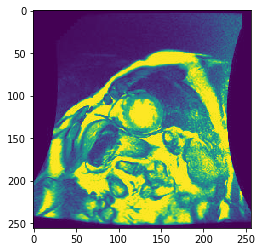

In [33]:
plt.imshow(images[3,:,:,0])

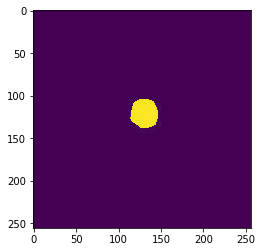

In [34]:
plt.imshow(masks[3,:,:,0])